In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def lsq(X12,b=None):
    b = np.ones(len(X12))
    w = np.dot(np.linalg.pinv(X12),b)
    return w  

def flda(c1,c2,p=False):
    u1 = np.mean(c1, axis=0)
    u2 = np.mean(c2, axis=0)
    S1 = (len(c1) -1)*np.cov(c1.T)
    S2 = (len(c2)-1)*np.cov(c2.T)
    Sw = np.add(S1,S2)
    iSw = np.linalg.inv(Sw)
    v = np.dot(iSw,(u1-u2))
    if p:
        v1 = np.c_[v, v]
        plotv(v1)
    return v
        
def fisher_project(v,c1,c2,p=True):
    Y1 = np.dot(v,c1.T)
    Y2 = np.dot(v,c2.T)
    Y = np.r_[Y1,Y2]
    Yn = np.vstack([Y,Y])
    if p:
        plotv(Yn.T)
    return Y
            

def plot_data(x1,x2,figname):
    plt.figure(1)
    s=20
    plt.scatter(x1[:,0],x1[:,1],color='r', s=2*s, marker='^', alpha=.8, label='C1')
    plt.scatter(x2[:,0],x2[:,1],color='g', s=2*s, marker='o', alpha=.8, label='C2')
    plt.title("Class1 vs. Class2")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.axis("tight")
    plt.legend(loc='upper left')
    plt.savefig(figname)
    
# This function is updated
def plot_classifier(X1,X2,w,figname):
    x11,x21,x12,x22 = X1[:,0],X1[:,1],X2[:,0],X2[:,1]
    c,a,b = w
    plt.figure()

    m = np.min([np.min(x11),np.min(x12),np.min(x21),np.min(x22)])
    M = np.max([np.max(x11),np.max(x12),np.max(x21),np.max(x22)])

    xx = np.linspace(m,M,100)
    yy = xx
    yy = -1*(a*xx + c)/b
    plt.plot(xx,yy,'y')
    plt.hold(True)
    s=20
    plt.scatter(x11,x21,color='r', s=2*s, marker='^', alpha=.8, label='C1')
    plt.scatter(x12,x22,color='g', s=2*s, marker='o', alpha=.8, label='C2')
    plt.axis("tight")
    plt.legend(loc='upper left')
    plt.title(figname)
    plt.savefig(figname)
    
def plotv(M):
	rows,cols = M.T.shape
	# print(rows,cols)

	#Get absolute maxes for axis ranges to center origin
	#This is optional
	maxes = 1.1*np.amax(abs(M), axis = 0)
	colors = ['b','r','k']
	fig = plt.figure()
	fig.suptitle('Vectors', fontsize=10, fontweight='bold')

	ax = fig.add_subplot(111)
	fig.subplots_adjust(top=0.85)
	ax.set_title("Fisher's Projection")

	ax.set_xlabel('x')
	ax.set_ylabel('y')

	for i,l in enumerate(range(0,cols)):
		# print(i)
	    plt.axes().arrow(0,0,M[i,0],M[i,1],head_width=0.2,head_length=0.1,zorder=3)

	    ax.text(M[i,0],M[i,1], str(np.round(M[i],2)), style='italic',
	        bbox={'facecolor':'red', 'alpha':0.5, 'pad':0.5})

	plt.plot(0,0,'ok') #<-- plot a black point at the origin
	# plt.axis('equal')  #<-- set the axes to the same scale
	plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
	plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits

	plt.grid(b=True, which='major') #<-- plot grid lines
	plt.show()

In [3]:
X1 = np.array([[3,3,2,0],[3,0,1,2]]).T
X2 = np.array([[-1,0,-1,1],[1,0,-1,0]]).T
X3 = np.array([[3,3,2,0],[3,0,1,1.5]]).T
X4 = np.array([[-1,0,-1,1],[1,0,-1,0]]).T   #same as X2(~ X4)


In [4]:
v1= flda(X1,X2)
v1

array([ 0.28630705,  0.25518672])

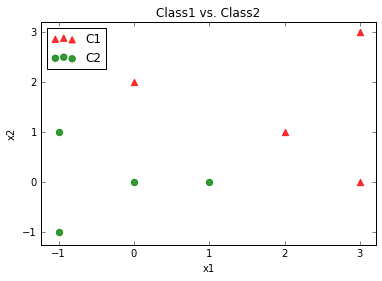

In [5]:
plot_data(X1,X2,"C1vsC2_Table1")


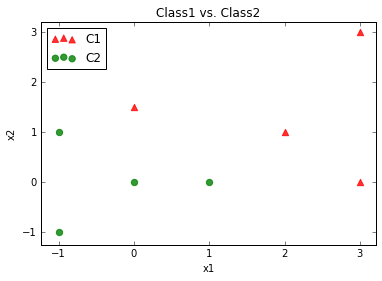

In [6]:
plot_data(X3,X4,"C3vsC4_Table2")

In [7]:
# Agumenting the data with ones 
X_1 = np.c_[np.ones(len(X1)), X1]
X_2 = np.c_[np.ones(len(X2)), X2]
X_3 = np.c_[np.ones(len(X3)), X3]
X_4 = np.c_[np.ones(len(X4)), X4]

# Concatinating data into one matrix and negating the class 2
X12 = np.r_[X_1,-X_2]
X34 = np.r_[X_3,-X_4]

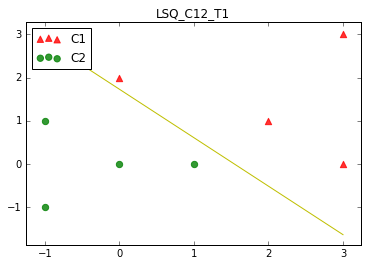

In [8]:
# finding a liniear classifier using LMS:
w1 = lsq(X12)
# Classification of the two classes with obtained weight vector from LMS technique
plot_classifier(X1,X2,w1,"LSQ_C12_T1")

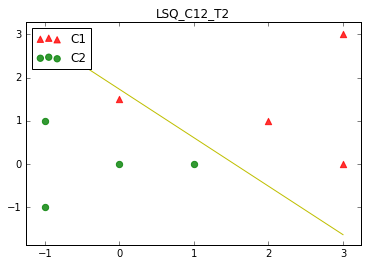

In [9]:
# finding a liniear classifier using LMS:
w2 = lsq(X34)
# Classification of the two classes with obtained weight vector from LMS technique
plot_classifier(X3,X4,w1,"LSQ_C12_T2")

In [10]:
v2 = flda(X3,X4)

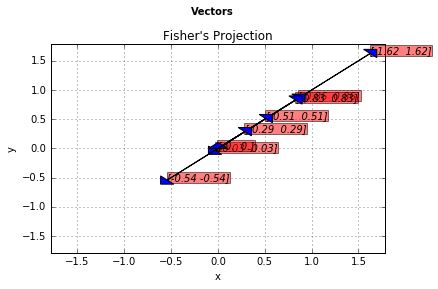

In [11]:
Xt12 = fisher_project(v1,X1,X2)
Y1 = Xt12

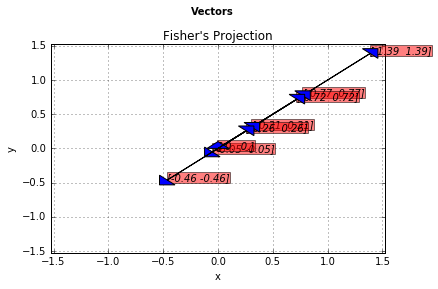

In [12]:
Xt34 = fisher_project(v2,X3,X4)
Y2 = Xt34

In [13]:
Y1

array([ 1.62448133,  0.85892116,  0.82780083,  0.51037344, -0.03112033,
        0.        , -0.54149378,  0.28630705])

In [14]:
Y2

array([ 1.388251  ,  0.77142857,  0.71989319,  0.30841121, -0.05153538,
        0.        , -0.46275033,  0.25714286])

In [15]:
# Finding b 
c1 = Y1[0:4]
c2 = Y1[4:8]
uc1 = np.mean(c1)
uc2 = np.mean(c2)

b = np.add(uc1,uc2)/2
W = np.append(-b,v1)

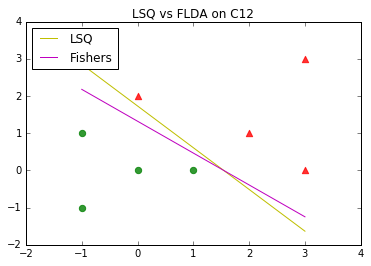

In [16]:

x11,x21,x12,x22 = X1[:,0],X1[:,1],X2[:,0],X2[:,1]
c,a,b = w1
wf = W
cf,af,bf = wf
plt.figure(5)

m = np.min([np.min(x11),np.min(x12),np.min(x21),np.min(x22)])
M = np.max([np.max(x11),np.max(x12),np.max(x21),np.max(x22)])

xx = np.linspace(m,M,100)
yy = xx
yy = -1*(a*xx + c)/b
plt.plot(xx,yy,'y',label="LSQ")

xf = np.linspace(m,M,100)
yf = -1*(af*xf + cf)/b
plt.plot(xf,yf,'m',label="Fishers")
plt.legend(loc = "upper left")
# plt.hold(True)
s=20
plt.scatter(x11,x21,color='r', s=2*s, marker='^', alpha=.8, label='C1')
plt.scatter(x12,x22,color='g', s=2*s, marker='o', alpha=.8, label='C2')
plt.title("LSQ vs FLDA on C12")
plt.savefig("LsqvsFLDA_C12")

In [17]:
# Finding b 
c1 = Y2[0:4]
c2 = Y2[4:8]
uc1 = np.mean(c1)
uc2 = np.mean(c2)

b = np.add(uc1,uc2)/2
W = np.append(-b,v1)

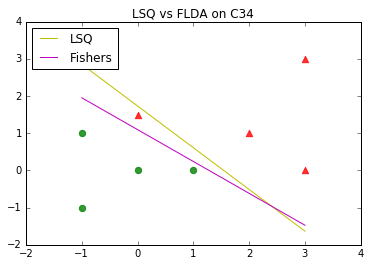

In [18]:

x11,x21,x12,x22 = X3[:,0],X3[:,1],X4[:,0],X4[:,1]
c,a,b = w1
wf = W
cf,af,bf = wf
plt.figure(5)

m = np.min([np.min(x11),np.min(x12),np.min(x21),np.min(x22)])
M = np.max([np.max(x11),np.max(x12),np.max(x21),np.max(x22)])

xx = np.linspace(m,M,100)
yy = xx
yy = -1*(a*xx + c)/b
plt.plot(xx,yy,'y',label="LSQ")

xf = np.linspace(m,M,100)
yf = -1*(af*xf + cf)/b
plt.plot(xf,yf,'m',label="Fishers")
plt.legend(loc = "upper left")

# plt.hold(True)
s=20
plt.scatter(x11,x21,color='r', s=2*s, marker='^', alpha=.8, label='C3')
plt.scatter(x12,x22,color='g', s=2*s, marker='o', alpha=.8, label='C4')
plt.title("LSQ vs FLDA on C34")
plt.savefig("LsqvsFLDA_C34")

### flda is classifying accurately than the least squares method 